# **World Happiness Report**

## **by Taner Süleyman**

### [Linkedin](https://www.linkedin.com/in/tsuleyman/)
### [Github](https://github.com/tsuleyman)

### [TR] 2015, 2016, 2017, 2018, 2019 yılları arasında 'Dünya Mutuluk Raporu' veri setleri kaynak gösterilerek ülkelerin mutluluk  oranları, yıllık sıra değişimleri karşılaştırmalı olarak gösterilmiştir.

### [EN] The 'World Happiness Report' datasets for the years 2015, 2016, 2017, 2018, 2019 are given as a source and the happiness rates of the countries and their annual rank changes are shown comparatively.

### [ALB] Të dhënat e 'Raportit të Lumturisë Botërore' për vitet 2015, 2016, 2017, 2018, 2019 janë dhënë si burim dhe normat e lumturisë së vendeve dhe ndryshimet e tyre vjetore të renditjes tregohen në mënyrë krahasuese.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


### Loading and Understanding Data

In [2]:
# Read 2015,2016,2017,2018,2019 report
data=pd.read_csv("/kaggle/input/world-happiness/2015.csv", encoding="ISO-8859-1")
data1=pd.read_csv("/kaggle/input/world-happiness/2016.csv", encoding="ISO-8859-1")
data2=pd.read_csv("/kaggle/input/world-happiness/2017.csv", encoding="ISO-8859-1")
data3=pd.read_csv("/kaggle/input/world-happiness/2018.csv", encoding="ISO-8859-1")
data4=pd.read_csv("/kaggle/input/world-happiness/2019.csv", encoding="ISO-8859-1")

### [TR] 2015 yılına ait olan verilerimizin önce ilk 10 sırasında olan verilerimizi ardından  listede son 10'da bulunan verileri inceleyelim.

### [EN] Let's examine our data, which is in the top 10 of our data for 2015, and then our last 10 data.

### [ALB] Le të shqyrtojmë fillimisht të dhënat në top 10 të të dhënave tona për vitin 2015, dhe më pas të dhënat në 10 të fundit në listë.

In [3]:
data.head(10) #Let's examine the first 10 columns of data!

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
# Let's examine the last 10 columns of data!
data.tail(10) 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


### [TR] 2016 yılına ait olan verilerimizin önce ilk 10 sırasında olan verilerimizi ardından  listede son 10'da bulunan verileri inceleyelim.

### [EN] Let's examine our data, which is in the top 10 of our data for 2016, and then our last 10 data.

### [ALB] Le të shqyrtojmë fillimisht të dhënat në top 10 të të dhënave tona për vitin 2016, dhe më pas të dhënat në 10 të fundit në listë.

In [5]:
data1.head(10) #Let's examine the first 10 columns of data!

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [6]:
data1.tail(10) 

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


### [TR] 2017 yılına ait olan verilerimizin önce ilk 10 sırasında olan verilerimizi ardından  listede son 10'da bulunan verileri inceleyelim.

### [EN] Let's examine our data, which is in the top 10 of our data for 2017, and then our last 10 data.

### [ALB] Le të shqyrtojmë fillimisht të dhënat në top 10 të të dhënave tona për vitin 2017, dhe më pas të dhënat në 10 të fundit në listë.

In [7]:
data2.head(10) #Let's examine the first 10 columns of data!

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [8]:
data2.tail(10) 

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
145,Yemen,146,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


### [TR] 2018 yılına ait olan verilerimizin önce ilk 10 sırasında olan verilerimizi ardından  listede son 10'da bulunan verileri inceleyelim.

### [EN] Let's examine our data, which is in the top 10 of our data for 2018, and then our last 10 data.

### [ALB] Le të shqyrtojmë fillimisht të dhënat në top 10 të të dhënave tona për vitin 2018, dhe më pas të dhënat në 10 të fundit në listë.

In [9]:
data3.head(10) #Let's examine the first 10 columns of data!

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [10]:
data3.tail(10) 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


### [TR] 2019 yılına ait olan verilerimizin önce ilk 10 sırasında olan verilerimizi ardından  listede son 10'da bulunan verileri inceleyelim.

### [EN] Let's examine our data, which is in the top 10 of our data for 2019, and then our last 10 data.

### [ALB] Le të shqyrtojmë fillimisht të dhënat në top 10 të të dhënave tona për vitin 2019, dhe më pas të dhënat në 10 të fundit në listë.

In [11]:
data4.head(10) #Let's examine the first 10 columns of data!

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [12]:
data4.tail(10) 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


### [TR] 2015, 2016, 2017, 2018, 2019 yılları arasında 'Dünya Mutuluk Raporu' veri setlerini ilk on ve son olarak inceledik. Şimdi ise grafikler üzerinde karşılaştıralım.
### [EN] We reviewed the 'World Happiness Report' datasets for the first ten and last years between 2015, 2016, 2017, 2018, 2019. Now let's compare the graphs.
### [ALB] Ne rishikuam grupet e të dhënave të "Raportit të Lumturisë Botërore" për dhjetë vitet e para dhe të fundit midis 2015, 2016, 2017, 2018, 2019. Tani le të krahasojmë grafikët.

In [13]:
# [TR] 'Country_region' olan değişkenleri 'Country' olarak düzenlenmiştir. 'Happiness.Score' olarak adlandırılan değişkenleri 'Happiness_Score' olarak değiştirdik.
# Not: Bu değişkenleri değiştirmemizin sebebi elimizde bulanan veri setlerindeki belirlediğimiz değişkenle aynı yapmak, hata payını azaltmaktır.

# [EN]Variables with 'country_region' are arranged as 'Country'. We changed the variables named 'Happiness.Score' to 'Happiness_Score'
# PS: The reason we changed these variables is to make them the same as the variable we determined in the data sets we have, to reduce the margin of error.

# [ALB]Variablat me 'country_region' renditen si 'Country'. Ne ndryshuam variablat me emrin 'Happiness.Score' në 'Happiness_Score'
# Shënim: Arsyeja pse i ndryshuam këto variabla është që t'i bëjmë ato të njëjta me variablin që kemi përcaktuar në grupet e të dhënave që kemi, për të zvogëluar marzhin e gabimit.



In [14]:
data.columns=data.columns.str.replace(' ','_')
data1.columns=data1.columns.str.replace(' ','_')
data2.columns=data2.columns.str.replace(' ','_')
data3.columns=data3.columns.str.replace(' ','_')
data4.columns=data4.columns.str.replace(' ','_')

In [15]:
data.columns


Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [16]:
data1.columns


Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')

In [17]:
data2=data2.rename(columns={"Happiness.Score":"Happiness_Score"
                      })

In [18]:
data2.columns

Index(['Country', 'Happiness.Rank', 'Happiness_Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [19]:
data3=data3.rename(columns={"Score":"Happiness_Score","Country_or_region":"Country"
                      })

In [20]:
data3.columns

Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [21]:
data4=data4.rename(columns={"Score":"Happiness_Score","Country_or_region":"Country"})

In [22]:
data4.columns

Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

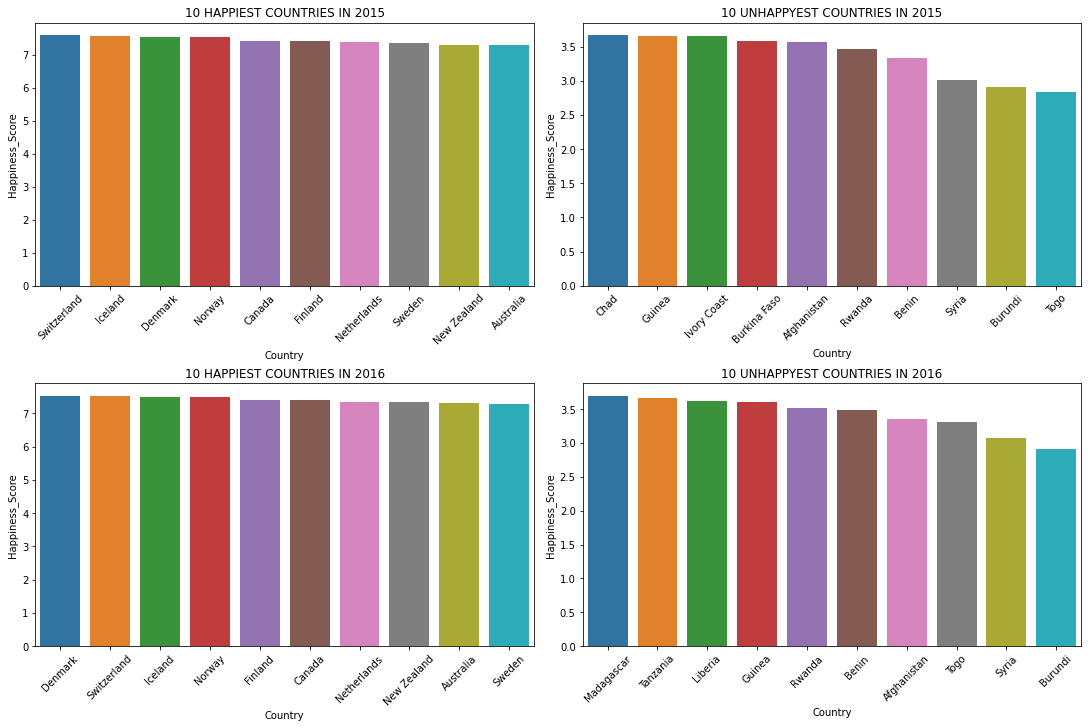

In [23]:
sort_data1 = data1.head(10)
sad_data1 = data1.tail(10)
sort_data = data.head(10)
sad_data = data.tail(10)

f, axs = plt.subplots(2,2, figsize = (15,10), constrained_layout = True)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_data , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sad_data , ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data1, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data1, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)



axs[0, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2015')
axs[0, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2015')
axs[1, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2016')
axs[1, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2016')



### [TR] 2015 yılına baktığımızda İsviçre birinci sırada,İzlanda peşinden Danimarkanın geldiğini görmekteyiz. Bununla birlikte Suriye, Burundi ve Togo ise son sıralarda yer almıştır.
### 2016 yılına geldiğimizde ise Danimarka, İzlanda ve İsviçrenin önüne geçerek 1.sırada yer alıdığını görmekteyiz. Togo ise Burundi ve Suriyeyi geçmesine rağmen son üçte yer almıştır.

### [EN] When we look at the year 2015, we see that Switzerland is in the first place, followed by Iceland. However, Syria, Burundi and Togo took the last place.
### When we come to 2016, we see that Denmark, Iceland and Switzerland are in the 1st place, ahead of them. Togo, on the other hand, is in the last three, despite beating Burundi and Syria.

### [ALB] Kur shikojmë vitin 2015, shohim se në vend të parë është Zvicra, e ndjekur nga Islanda. Megjithatë, Siria, Burundi dhe Togo zunë vendin e fundit.
### Kur vijmë në vitin 2016, shohim se Danimarka, Islanda dhe Zvicra janë në vendin e parë, përpara tyre. Nga ana tjetër, Togo është në tre të fundit, pavarësisht se mundi Burundin dhe Sirinë.

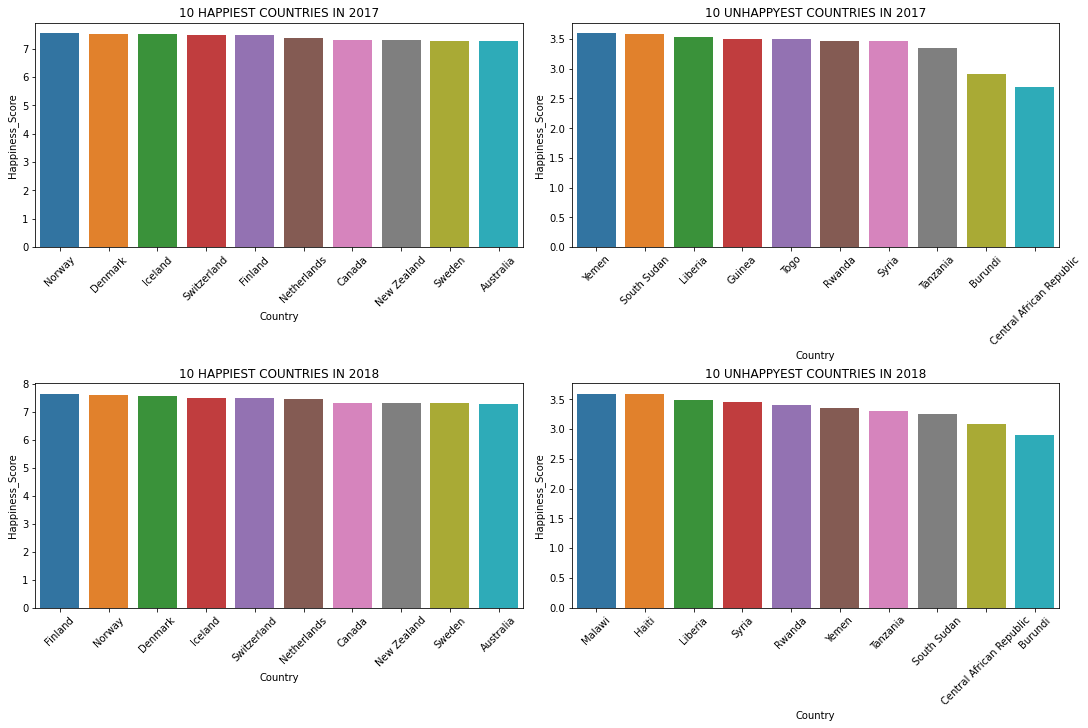

In [24]:
sort_data2 = data2.head(10)
sad_data2 = data2.tail(10)
sort_data3 = data3.head(10)
sad_data3 = data3.tail(10)


f, axs = plt.subplots(2,2, figsize = (15,10), constrained_layout = True)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data2, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data2, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data3, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data3, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)


axs[0, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2017')
axs[0, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2017')
axs[1, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2018')
axs[1, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2018')




### [TR] 2017 yılı verilerini incelediğimizde Danimarka bir sıra gerileyerek 1.sırayı Norveç'e bırakırken 3.sırada İzlanda'nın geldiğini görmekteyiz. Son sıralara baktığımızda ise Tanzanya, Burundi ve Orta Afrika Cumhuriyeti bulunmaktadır.
### 2018 yılına geldiğimizde ise 2015 te 6.sırada olan Finlandiya'nın 1.sıraya yükseldiğini peşinden de Norveç ve  Danimarka'nın takip ettini görmekteyiz. Son üç sıraya baktığımızda ise Güney Sudan, Orta Afrika Cumhuriyeti ve son sırada Burundi bulunmaktadır.

### [EN] When we analyze the data for 2017, we see that Denmark dropped one place and left Norway in the 1st place, while Iceland came in the 3rd place. When we look at the last rows, there are Tanzania, Burundi and the Central African Republic.
### When we come to 2018, we see that Finland, which was 6th in 2015, rose to 1st place, followed by Norway and Denmark. When we look at the last three rows, South Sudan, Central African Republic and Burundi are in the last row.

### [ALB] Kur analizojmë të dhënat për vitin 2017, shohim se Danimarka ka regres një vend, duke u renditur e para nga Norvegjia dhe e treta në Islandë. Si rezultat, Tanzania, Burundi dhe Republika e Afrikës Qendrore.
### Kur vijmë në 2018, shohim se Finlanda, e cila ishte e 6-ta në 2015, u ngjit në vendin e 1-të, e ndjekur nga Norvegjia dhe Danimarka. Kur shikojmë tre rreshtat e fundit, Sudani i Jugut, Republika e Afrikës Qendrore dhe Burundi zënë vendin e fundit.

## [TR] 2019 yılında tüm ülkelerin mutluluk skorlarını tek tek inceleyebilmek için dünya haritası üzerinden inceleyebiliriz.

## [EN] In order to examine the happiness scores of all countries one by one in 2019, we can examine them on the world map.

## [ALB] Për të shqyrtuar rezultatet e lumturisë së të gjitha vendeve një nga një në vitin 2019, ne mund t'i shqyrtojmë ato në hartën e botës.


In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(data4, locations='Country',
                    locationmode = "country names",
                    color="Happiness_Score",
                    hover_name = 'Country',
                    hover_data={'Country':False,
                                'Happiness_Score': True
                               }
                   )
fig.update_layout(width=1000, height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()